In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import sys

In [4]:
sys.path.append("/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools")
import database_tools as dbt
import importlib
importlib.reload(dbt)

<module 'database_tools' from '/Users/jrobinson/atlas-phase-curves/atlas-phase-curves/tools/database_tools.py'>

In [5]:
# fname="atlas_phase_fits_orbs_17_6_2021.csv"
fname="atlas_phase_fits_orbs_26_8_2021.csv"

In [6]:
# load the dataframe of our phase fits, including orbital elements columns (astorb)
df_atlas=dbt.load_atlas_phase_fits_orbs(fname)

In [7]:
df_atlas

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_2M10_o,phase_curve_app_res_range_3M10_c,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,0.000000,NaN,NaN,0.220321,0.000000,0.212194,0.000000,2.765655,0.078394,10.588194
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.773779,0.229762,34.898597
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.155523,0.072645,0.166479,0.047789,0.147802,0.053720,0.152937,2.668151,0.256965,12.991481
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.361650,0.088349,7.141462
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.161659,0.057884,0.139641,0.040578,0.159526,0.040899,0.161641,2.573926,0.190614,5.367602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.895502,0.061007,19.145688
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.000000,NaN,0.000000,NaN,0.000000,0.000000,3.132320,0.111520,9.487708
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,2.699094,0.290773,13.435809
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.872771,0.067888,17.850431


# check that atlas_phase_fits and orbital_elements are correctly combined

In [8]:
# df_atlas["mpc_number"].equals(df_atlas["mpc_number.1"])

In [9]:
# mask=df_atlas["mpc_number"]==df_atlas["mpc_number.1"]

In [10]:
# # apparently not all mpc_numbers are equal
# print(len(df_atlas))
# print(sum(mask))

In [11]:
# df_mpc_test=df_atlas[~mask][["mpc_number","mpc_number.1","name","name.1"]]

In [12]:
# # The unequal mpc_numbers are NaN entries
# df_mpc_test

In [13]:
# # When mpc_number = NaN the names are the same
# df_mpc_test["name"].equals(df_mpc_test["name.1"])

In [14]:
# # All names are the same in the full db
# df_atlas["name"].equals(df_atlas["name.1"])

In [15]:
# if (df_mpc_test["name"].equals(df_mpc_test["name.1"])) and (df_atlas["name"].equals(df_atlas["name.1"])):
#     print("database is correct, drop duplicate columns")
#     df_atlas = df_atlas.drop(["mpc_number.1","name.1"],axis=1)

In [16]:
# list(df_atlas)

# look at a particular model + filter

In [17]:
model="B89"
filt="o"
model_filt="{}_{}".format(model,filt)

In [18]:
# add some more useful columns
df_atlas=dbt.atlas_phase_fits_new_cols(df_atlas,model=model,filt=filt)

In [19]:
model_params=[x for x in list(df_atlas) if "_{}".format(model_filt) in x]
print(model_params)
print(len(model_params))

['phase_curve_G_B89_o', 'phase_curve_G_err_B89_o', 'phase_curve_H_B89_o', 'phase_curve_H_err_B89_o', 'phase_curve_N_alpha_low_B89_o', 'phase_curve_N_fit_B89_o', 'phase_curve_N_iter_B89_o', 'phase_curve_N_mag_err_B89_o', 'phase_curve_N_nights_B89_o', 'phase_curve_alpha_max_B89_o', 'phase_curve_alpha_min_B89_o', 'phase_curve_ier_B89_o', 'phase_curve_nfev_B89_o', 'phase_curve_OC_mean_B89_o', 'phase_curve_OC_range_B89_o', 'phase_curve_OC_std_B89_o', 'phase_curve_N_cut_B89_o', 'phase_curve_app_res_med_B89_o', 'phase_curve_app_res_std_B89_o', 'phase_curve_app_res_range_B89_o', 'phase_angle_range_B89_o', 'phase_curve_frac_good_fit_B89_o']
22


In [20]:
# print(list(df_atlas))
print(len(list(df_atlas)))

186


In [21]:
%matplotlib inline

0 0 0 phase_curve_G_B89_o
1 0 1 phase_curve_G_err_B89_o
2 0 2 phase_curve_H_B89_o
3 0 3 phase_curve_H_err_B89_o
4 0 4 phase_curve_N_alpha_low_B89_o
5 1 0 phase_curve_N_fit_B89_o
6 1 1 phase_curve_N_iter_B89_o
7 1 2 phase_curve_N_mag_err_B89_o
8 1 3 phase_curve_N_nights_B89_o
9 1 4 phase_curve_alpha_max_B89_o
10 2 0 phase_curve_alpha_min_B89_o
11 2 1 phase_curve_ier_B89_o
12 2 2 phase_curve_nfev_B89_o
13 2 3 phase_curve_OC_mean_B89_o
14 2 4 phase_curve_OC_range_B89_o
15 3 0 phase_curve_OC_std_B89_o
16 3 1 phase_curve_N_cut_B89_o
17 3 2 phase_curve_app_res_med_B89_o
18 3 3 phase_curve_app_res_std_B89_o
19 3 4 phase_curve_app_res_range_B89_o


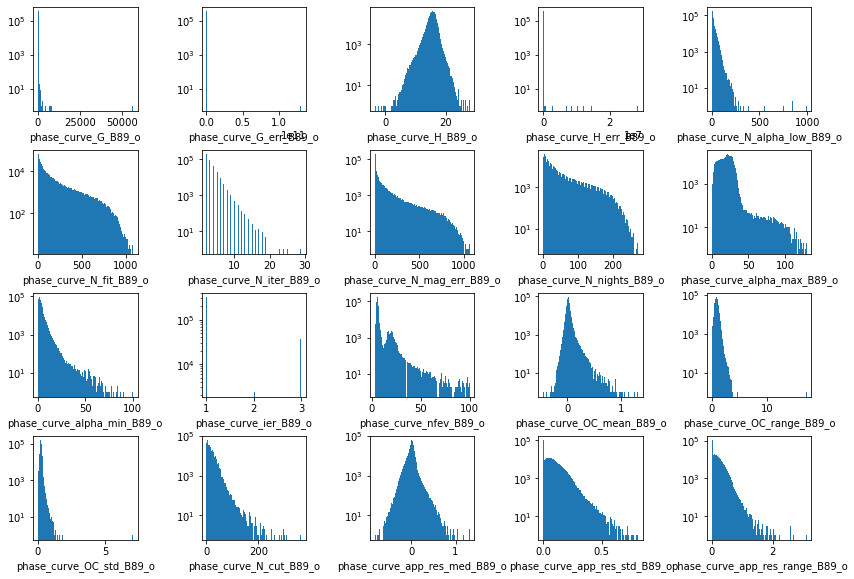

In [22]:
x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_atlas,x_fig,y_fig,model_params,n_bins,plot_log)

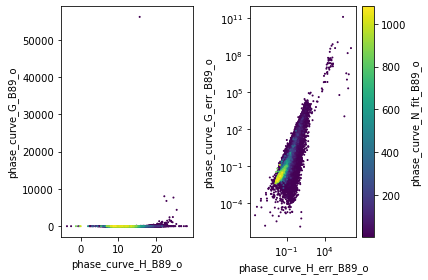

In [23]:
x_plot1="phase_curve_H_B89_o"
y_plot1="phase_curve_G_B89_o"
x_plot2="phase_curve_H_err_B89_o"
y_plot2="phase_curve_G_err_B89_o"

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax2.set_xscale("log")
ax2.set_yscale("log")

plt.tight_layout()

# Investigate the nans

In [24]:
df_atlas

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
0,2018-06-01 12:18:01,31.0,13.0,18.0,59242.220336,2021-01-15 04:02:43,2021-01-30 02:22:48,1.0,Ceres,1.0,...,NaN,0.220321,0.000000,0.212194,0.000000,2.765655,0.078394,10.588194,9.9473,1.000000
1,NaN,24.0,3.0,20.0,59160.239745,2020-05-24 07:16:19,2020-11-09 13:23:01,2.0,Pallas,2.0,...,NaN,NaN,NaN,NaN,NaN,2.773779,0.229762,34.898597,9.8451,1.000000
2,NaN,45.0,20.0,25.0,59300.540000,2021-06-10 03:45:40,2021-06-12 21:05:18,3.0,Juno,3.0,...,0.166479,0.047789,0.147802,0.053720,0.152937,2.668151,0.256965,12.991481,25.7409,1.000000
3,NaN,12.0,7.0,5.0,59233.510382,2021-01-25 00:07:31,2020-03-17 23:04:16,4.0,Vesta,4.0,...,NaN,NaN,NaN,NaN,NaN,2.361650,0.088349,7.141462,3.8014,1.000000
4,2020-10-20 15:12:33,193.0,49.0,141.0,59349.566586,2021-06-16 22:09:32,2021-06-15 21:02:16,5.0,Astraea,5.0,...,0.139641,0.040578,0.159526,0.040899,0.161641,2.573926,0.190614,5.367602,17.6548,0.989583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434034,NaN,10.0,7.0,3.0,59277.428275,2021-06-10 09:40:14,2021-06-11 09:39:22,506906.0,2008 CK194,553711.0,...,NaN,NaN,NaN,0.000000,0.000000,1.895502,0.061007,19.145688,NaN,NaN
434035,NaN,15.0,12.0,3.0,59267.395093,2021-06-10 12:11:55,2021-06-10 20:44:26,549516.0,2011 KP48,603135.0,...,NaN,0.000000,NaN,0.000000,0.000000,3.132320,0.111520,9.487708,NaN,NaN
434036,NaN,18.0,14.0,4.0,59352.314387,2021-06-17 01:11:09,2021-06-17 06:21:32,550221.0,2012 CK5,613285.0,...,0.000000,NaN,0.000000,0.000000,0.000000,2.699094,0.290773,13.435809,0.0106,0.000000
434037,NaN,18.0,13.0,5.0,59257.465220,2021-06-10 00:23:51,2021-02-03 07:14:23,551041.0,2012 VB7,624230.0,...,NaN,NaN,NaN,0.000000,0.000000,1.872771,0.067888,17.850431,NaN,NaN


In [25]:
# some objects have nans for some metrics (should have values if the fit was successful!)
df_atlas[["mpc_number","name"]+model_params][df_atlas[model_params].isna().any(axis=1)]

,mpc_number,name,phase_curve_G_B89_o,phase_curve_G_err_B89_o,phase_curve_H_B89_o,phase_curve_H_err_B89_o,phase_curve_N_alpha_low_B89_o,phase_curve_N_fit_B89_o,phase_curve_N_iter_B89_o,phase_curve_N_mag_err_B89_o,...,phase_curve_nfev_B89_o,phase_curve_OC_mean_B89_o,phase_curve_OC_range_B89_o,phase_curve_OC_std_B89_o,phase_curve_N_cut_B89_o,phase_curve_app_res_med_B89_o,phase_curve_app_res_std_B89_o,phase_curve_app_res_range_B89_o,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
1,2.0,Pallas,0.144562,0.302950,3.95182,0.404486,0.0,6.0,3.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.8451,1.0
3,4.0,Vesta,-0.548897,0.014673,2.55513,0.121815,0.0,3.0,3.0,3.0,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.8014,1.0
353,354.0,Eleonora,0.189116,0.195527,5.73551,0.235920,0.0,18.0,2.0,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1884,NaN
1314,1316.0,Kasan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,2063.0,Bacchus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434031,491357.0,2012 AW14,-0.404437,0.172454,15.23900,0.310719,0.0,4.0,2.0,0.0,...,17.0,0.00911,0.181053,0.064593,NaN,NaN,NaN,NaN,2.5701,0.0
434034,506906.0,2008 CK194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434035,549516.0,2011 KP48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434037,551041.0,2012 VB7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# only a subset of objects have all nans for B89 (failed to fit completely)
df_atlas[model_params][df_atlas[model_params].isna().all(axis=1)]

,phase_curve_G_B89_o,phase_curve_G_err_B89_o,phase_curve_H_B89_o,phase_curve_H_err_B89_o,phase_curve_N_alpha_low_B89_o,phase_curve_N_fit_B89_o,phase_curve_N_iter_B89_o,phase_curve_N_mag_err_B89_o,phase_curve_N_nights_B89_o,phase_curve_alpha_max_B89_o,...,phase_curve_nfev_B89_o,phase_curve_OC_mean_B89_o,phase_curve_OC_range_B89_o,phase_curve_OC_std_B89_o,phase_curve_N_cut_B89_o,phase_curve_app_res_med_B89_o,phase_curve_app_res_std_B89_o,phase_curve_app_res_range_B89_o,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# drop the rows that have nans for ALL params for that model and filter

In [27]:
df_atlas=df_atlas[~df_atlas[model_params].isna().all(axis=1)]

In [28]:
len(df_atlas)

356751

# Cut centaurs and distant objects

In [29]:
J_aphelion=5.46 # Jupiter aphelion
mask=(df_atlas["a_semimajor_axis"]>J_aphelion)
df_outer = df_atlas[mask]

In [30]:
df_outer[["mpc_number","name","phase_curve_H_B89_o","phase_curve_G_B89_o","detection_count"]]

,mpc_number,name,phase_curve_H_B89_o,phase_curve_G_B89_o,detection_count
943,944.0,Hidalgo,10.287200,0.092711,894.0
2056,2060.0,Chiron,5.396930,0.203106,1080.0
10153,10199.0,Chariklo,6.396720,0.570011,740.0
36984,37117.0,Narcissus,12.853700,0.050908,371.0
38485,38628.0,Huya,4.398690,0.200934,674.0
44428,44594.0,1999 OX3,6.691240,0.533422,421.0
47001,47171.0,Lempo,4.502400,0.881808,455.0
54399,54598.0,Bienor,7.079790,0.413208,792.0
55361,55565.0,2002 AW197,2.858100,-0.227001,122.0
55431,55636.0,2002 TX300,3.159980,2.217750,454.0


# look at orbital dist of all objects

In [31]:
%matplotlib notebook

In [32]:
%matplotlib inline

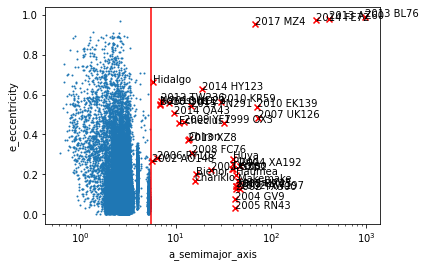

In [33]:
x_plot="a_semimajor_axis"
y_plot="e_eccentricity"
# y_plot="i_inclination_deg"

df_plot=df_atlas[~mask]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)
ax1.scatter(df_outer[x_plot],df_outer[y_plot],c="r",marker="x",alpha=1)

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

ax1.set_xscale("log")
# ax1.set_ylim(0,1)

ax1.axvline(J_aphelion,c="r")

# label selected points

for i in range(len(df_outer)):
    ax1.text(df_outer.iloc[i][x_plot],df_outer.iloc[i][y_plot],df_outer.iloc[i]["name"])
    
# ax1.legend()

# ax1.set_xlim(5,7)

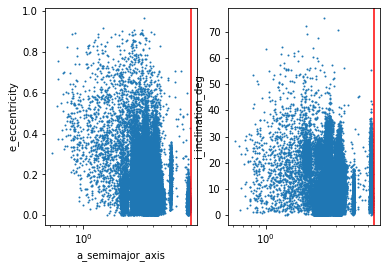

In [34]:
x_plot="a_semimajor_axis"
y_plot1="e_eccentricity"
y_plot2="i_inclination_deg"

df_plot=df_atlas[~mask]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

ax1.scatter(df_plot[x_plot],df_plot[y_plot1],s=1,alpha=1)
ax2.scatter(df_plot[x_plot],df_plot[y_plot2],s=1,alpha=1)

ax1.set_ylabel(y_plot1)
ax1.set_xlabel(x_plot)
ax2.set_ylabel(y_plot2)

ax1.set_xscale("log")
ax2.set_xscale("log")

# ax1.set_ylim(0,1)

ax1.axvline(J_aphelion,c="r")
ax2.axvline(J_aphelion,c="r")

# Analyse the inner asteroids only

In [35]:
df_atlas=df_atlas[~mask]

In [36]:
len(df_atlas)

356711

# First cut is on number of detections

In [37]:
N_fit_cut=100

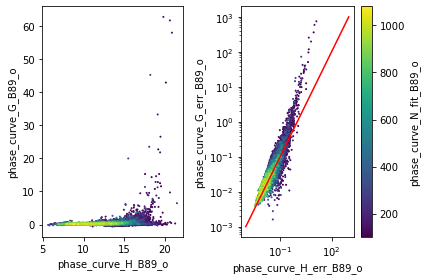

In [38]:
x_plot1="phase_curve_H_B89_o"
y_plot1="phase_curve_G_B89_o"
x_plot2="phase_curve_H_err_B89_o"
y_plot2="phase_curve_G_err_B89_o"

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax2.set_xscale("log")
ax2.set_yscale("log")

x_grid=np.logspace(-3,3)
ax2.plot(x_grid,x_grid,c="r")

plt.tight_layout()

129508


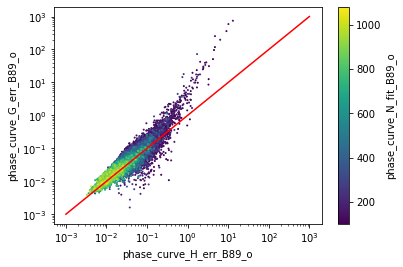

In [39]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
print(len(df_plot))
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

# Cut on N_alpha_low

In [40]:
df_N_fit_cut=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]

In [41]:
%matplotlib notebook

In [42]:
%matplotlib inline

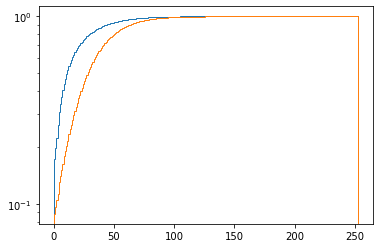

In [43]:
bins=np.arange(0,np.amax(df_atlas["phase_curve_N_alpha_low_B89_o"])+1)
x=plt.hist(df_atlas["phase_curve_N_alpha_low_B89_o"], cumulative=True, histtype='step',log=True,
           density=True,
           bins=bins)
x=plt.hist(df_N_fit_cut["phase_curve_N_alpha_low_B89_o"], cumulative=True, histtype='step',log=True,
           density=True,
           bins=bins)
# plt.xlim(0,10)

In [44]:
for i in range(1,8+1):
    x=len(df_atlas[df_atlas["phase_curve_N_alpha_low_B89_o"]<i])
    y=len(df_N_fit_cut[df_N_fit_cut["phase_curve_N_alpha_low_B89_o"]<i])
    print(i,x,y)

1 61981 11448
2 70424 12500
3 80183 13526
4 93610 14678
5 109858 16874
6 121817 18343
7 133033 19676
8 143937 21113


After we have already cut on N_fit>=100 we have already got rid of many fits with low N_alpha_low

In [45]:
N_alpha_low_cut=1

11448
11855


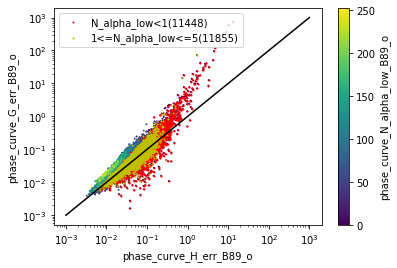

In [46]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
# c_plot="phase_curve_N_fit_B89_o"
c_plot="phase_curve_N_alpha_low_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

df_plot2=df_plot[df_plot["phase_curve_N_alpha_low_B89_o"]<N_alpha_low_cut]
df_plot3=df_plot[(df_plot["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
                & (df_plot["phase_curve_N_alpha_low_B89_o"]<=8)]

print(len(df_plot2))
print(len(df_plot3))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r",label="N_alpha_low<1({})".format(len(df_plot2)))
ax1.scatter(df_plot3[x_plot],df_plot3[y_plot],s=1,c="y",label="1<=N_alpha_low<=5({})".format(len(df_plot3)))

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="k")

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.legend()

The biggest gain in outlier rejection comes from dropping fits with N_alpha_low=0

But should we still trust any fits that don't have multiple ATLAS tracklets at low phase?

118060


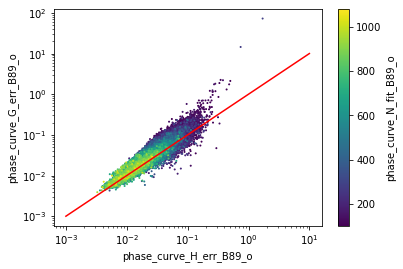

In [47]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)
print(len(df_plot))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

# Hard cut on errors

In [48]:
H_err_cut=0.2
G_err_cut=0.4

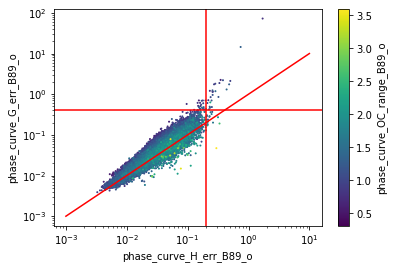

In [49]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
# c_plot="phase_curve_N_fit_B89_o"
# c_plot="phase_curve_ier_B89_o"
# c_plot="phase_curve_G_B89_o"
c_plot="phase_curve_OC_range_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)


df_plot2=df_plot[(df_plot["phase_curve_H_err_B89_o"]>H_err_cut)
                | (df_plot["phase_curve_G_err_B89_o"]>G_err_cut)]
        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

# ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r")

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.axvline(H_err_cut,c="r")
ax1.axhline(G_err_cut,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

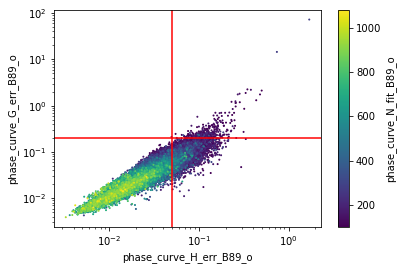

In [145]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)
        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax1.axvline(0.05,c="r")
ax1.axhline(0.2,c="r")

# s1=ax1.hist2d(np.log10(df_plot[x_plot]),np.log10(df_plot[y_plot]),bins=(100,100))
# cbar=plt.colorbar(s1[3])
# cbar.set_label("N")
# # ax1.set_xlabel(x_plot)
# # ax1.set_ylabel(y_plot)
# ax1.axvline(np.log10(0.05),c="r")
# ax1.axhline(np.log10(0.2),c="r")

In [50]:
len(df_plot2)

70

In [51]:
df_plot2[["mpc_number","name"]+model_params].sort_values("phase_curve_N_fit_B89_o")

,mpc_number,name,phase_curve_G_B89_o,phase_curve_G_err_B89_o,phase_curve_H_B89_o,phase_curve_H_err_B89_o,phase_curve_N_alpha_low_B89_o,phase_curve_N_fit_B89_o,phase_curve_N_iter_B89_o,phase_curve_N_mag_err_B89_o,...,phase_curve_nfev_B89_o,phase_curve_OC_mean_B89_o,phase_curve_OC_range_B89_o,phase_curve_OC_std_B89_o,phase_curve_N_cut_B89_o,phase_curve_app_res_med_B89_o,phase_curve_app_res_std_B89_o,phase_curve_app_res_range_B89_o,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
121179,122791.0,2000 SJ92,1.745960,0.434085,16.0429,0.162210,1.0,100.0,6.0,14.0,...,6.0,0.060524,0.914543,0.241844,37.0,-0.054080,0.263251,0.677777,19.2930,0.140000
136780,139404.0,2001 OE2,2.814950,0.960666,15.8763,0.257309,12.0,100.0,3.0,7.0,...,7.0,0.034793,1.167650,0.323205,27.0,-0.053273,0.241128,0.589133,18.4693,0.070000
251129,302551.0,2002 OC23,2.225500,1.308100,16.5589,0.436483,8.0,100.0,5.0,11.0,...,8.0,0.049171,1.437820,0.393206,10.0,-0.110559,0.367259,0.734518,21.3860,0.110000
112882,114089.0,2002 VJ38,2.283980,0.552897,16.1962,0.166824,10.0,101.0,4.0,0.0,...,7.0,0.034380,1.013810,0.247165,41.0,0.089879,0.266985,0.667825,22.3437,0.000000
93622,94313.0,2001 FE41,1.679080,0.629271,13.7454,0.235371,12.0,101.0,3.0,18.0,...,7.0,0.230655,2.226750,0.586360,13.0,-0.268601,0.714726,1.429450,17.5347,0.178218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146066,149537.0,2003 GE42,0.333673,0.172083,14.4831,0.212377,1.0,198.0,2.0,58.0,...,5.0,0.090006,2.150560,0.488667,19.0,0.024132,0.251858,0.605970,31.1811,0.292929
142961,146134.0,2000 SE1,0.981950,0.360185,16.6573,0.238073,8.0,206.0,4.0,126.0,...,6.0,-0.037962,1.581600,0.386510,25.0,-0.448011,0.229482,0.548117,44.7265,0.611650
241421,282934.0,2007 PX44,0.397387,0.182976,15.6366,0.213330,1.0,258.0,2.0,63.0,...,3.0,0.052768,1.118160,0.237772,24.0,-0.085959,0.139046,0.278092,29.7768,0.244186
304053,457175.0,2008 GO98,20.004500,14.489300,15.5071,0.742170,5.0,280.0,9.0,124.0,...,9.0,0.055048,1.316850,0.301354,83.0,-0.004013,0.140857,0.281713,18.1359,0.442857


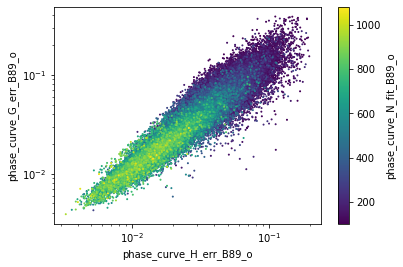

In [52]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
                & (df_atlas["phase_curve_H_err_B89_o"]<=H_err_cut)
                & (df_atlas["phase_curve_G_err_B89_o"]<=G_err_cut)]

df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

# x_grid=np.logspace(-3,0)
# ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

Text(0, 0.5, 'n')

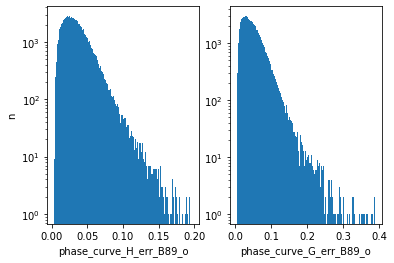

In [53]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

x=ax1.hist(df_plot[x_plot1],bins="auto",log=True)
x=ax2.hist(df_plot[x_plot2],bins="auto",log=True)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

Text(0, 0.5, 'n')

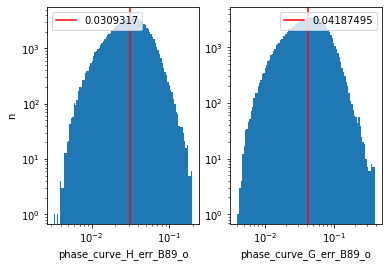

In [54]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

nbins=100
bins1=np.logspace(np.log10(np.amin(df_plot[x_plot1])),np.log10(np.amax(df_plot[x_plot1])), nbins)
bins2=np.logspace(np.log10(np.amin(df_plot[x_plot2])),np.log10(np.amax(df_plot[x_plot2])), nbins)

x=ax1.hist(df_plot[x_plot1],bins=bins1,log=True)
x=ax2.hist(df_plot[x_plot2],bins=bins2,log=True)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.axvline(np.median(df_plot[x_plot1]),c="r",label="{}".format(np.median(df_plot[x_plot1])))
ax2.axvline(np.median(df_plot[x_plot2]),c="r",label="{}".format(np.median(df_plot[x_plot2])))

ax1.legend()
ax2.legend()

ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_ylabel("n")

0 0 0 phase_curve_G_B89_o
1 0 1 phase_curve_G_err_B89_o
2 0 2 phase_curve_H_B89_o
3 0 3 phase_curve_H_err_B89_o
4 0 4 phase_curve_N_alpha_low_B89_o
5 1 0 phase_curve_N_fit_B89_o
6 1 1 phase_curve_N_iter_B89_o
7 1 2 phase_curve_N_mag_err_B89_o
8 1 3 phase_curve_N_nights_B89_o
9 1 4 phase_curve_alpha_max_B89_o
10 2 0 phase_curve_alpha_min_B89_o
11 2 1 phase_curve_ier_B89_o
12 2 2 phase_curve_nfev_B89_o
13 2 3 phase_curve_OC_mean_B89_o
14 2 4 phase_curve_OC_range_B89_o
15 3 0 phase_curve_OC_std_B89_o
16 3 1 phase_curve_N_cut_B89_o
17 3 2 phase_curve_app_res_med_B89_o
18 3 3 phase_curve_app_res_std_B89_o
19 3 4 phase_curve_app_res_range_B89_o


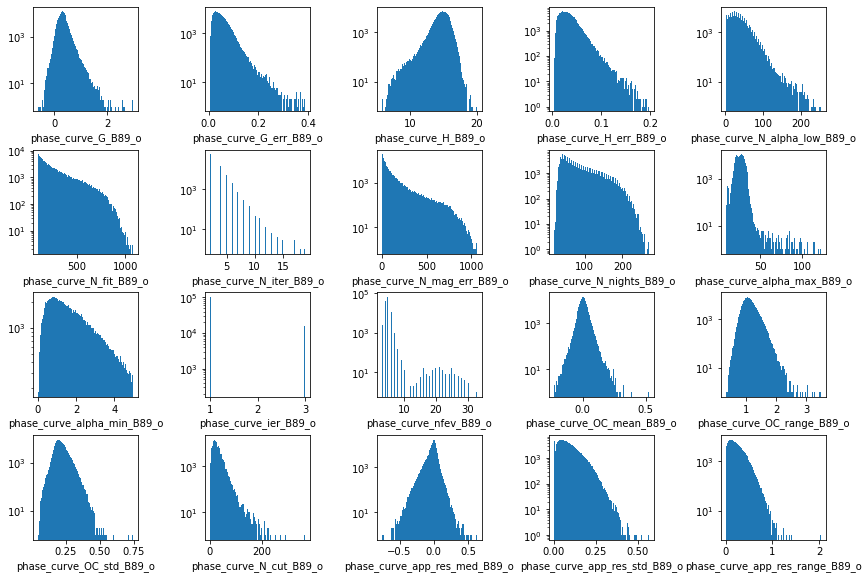

In [55]:
x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_plot,x_fig,y_fig,model_params,n_bins,plot_log)

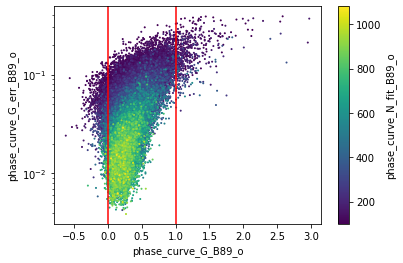

In [56]:
x_plot="phase_curve_G_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"
# c_plot="phase_curve_n_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
                & (df_atlas["phase_curve_H_err_B89_o"]<=H_err_cut)
                & (df_atlas["phase_curve_G_err_B89_o"]<=G_err_cut)]

df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

# ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.axvline(0,c="r")
ax1.axvline(1,c="r")

# Error Distribution vs metric analysis
Start with N_fit

In [57]:
%matplotlib notebook

In [58]:
%matplotlib inline

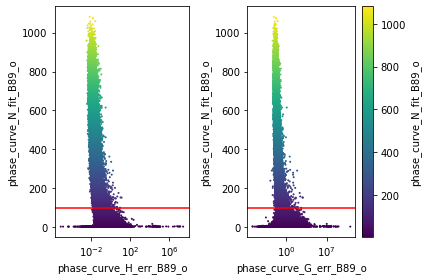

In [59]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_N_fit_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas#[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_fit_cut,c="r")
ax2.axhline(N_fit_cut,c="r")

plt.tight_layout()

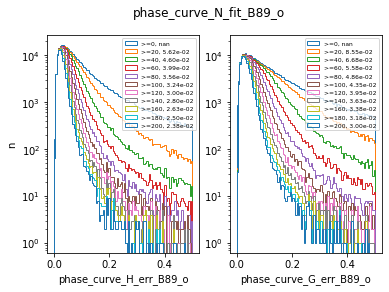

In [60]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharey=ax1)

fig.suptitle("phase_curve_N_fit_B89_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
# bins=np.linspace(0,1,100) # choose bins such that limits are set
bins=np.linspace(0,0.5,100) # choose bins such that limits are set

for _N_fit_cut in np.arange(0,200+20,20):
    df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=_N_fit_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(_N_fit_cut,np.median(df_plot[x_plot1])))
    x=ax2.hist(df_plot[x_plot2],bins=bins,log=True,histtype="step",
              label=">={}, {:.2e}".format(_N_fit_cut,np.median(df_plot[x_plot2])))

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.legend(fontsize=6)
ax2.legend(fontsize=6)

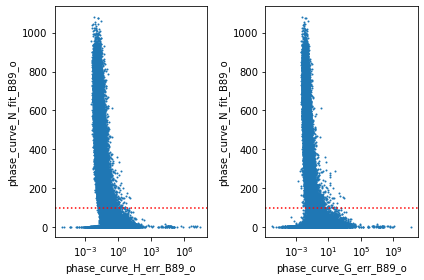

In [61]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_N_fit_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

df_plot=df_atlas[~(np.isnan(df_atlas["phase_curve_H_err_B89_o"]))
#     & (df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)            
                ]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1)
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_fit_cut,c="r",ls=":")
ax2.axhline(N_fit_cut,c="r",ls=":")

plt.tight_layout()

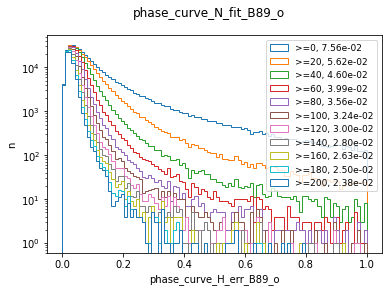

In [62]:
x_plot1="phase_curve_H_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

fig.suptitle("phase_curve_N_fit_B89_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
bins=np.linspace(0,1,100) # choose bins such that limits are set
# bins=np.linspace(0,0.5,100) # choose bins such that limits are set

med_err_list=[]
N_fit_cut_list=[]
for _N_fit_cut in np.arange(0,200+20,20):
    df_plot=df_atlas[~(np.isnan(df_atlas["phase_curve_H_err_B89_o"]))
                     &(df_atlas["phase_curve_N_fit_B89_o"]>=_N_fit_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(_N_fit_cut,np.median(df_plot[x_plot1])))
    med_err_list.append(np.median(df_plot[x_plot1]))
    N_fit_cut_list.append(_N_fit_cut)
    
ax1.set_xlabel(x_plot1)
ax1.set_ylabel("n")

ax1.legend(fontsize=9)

Text(0, 0.5, 'median(H_err_B89_o)')

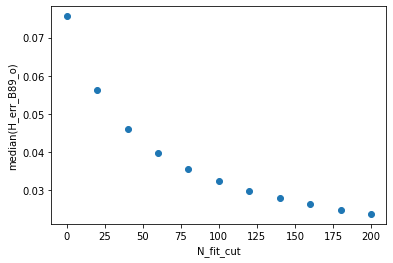

In [63]:
plt.scatter(N_fit_cut_list,med_err_list)
plt.xlabel("N_fit_cut")
plt.ylabel("median(H_err_B89_o)")

# Consider number of data points with phase angle < 5 degrees

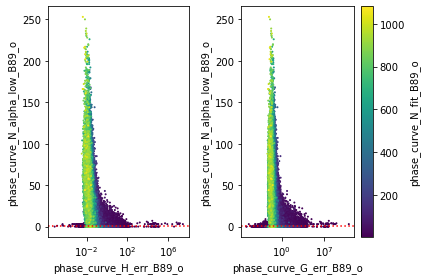

In [64]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_N_alpha_low_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas#[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_alpha_low_cut,c="r",ls=":")
ax2.axhline(N_alpha_low_cut,c="r",ls=":")

plt.tight_layout()

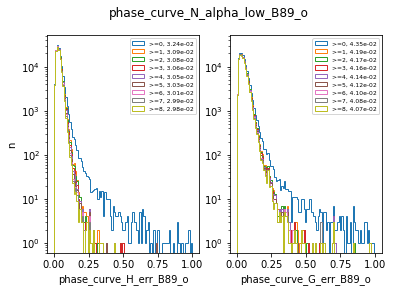

In [65]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharey=ax1)

fig.suptitle("phase_curve_N_alpha_low_B89_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
bins=np.linspace(0,1,100) # choose bins such that limits are set

# for N_alph_cut in range(10+1):
for N_alph_cut in range(8+1):
    df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                    & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alph_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(N_alph_cut,np.median(df_plot[x_plot1])))
    x=ax2.hist(df_plot[x_plot2],bins=bins,log=True,histtype="step",
              label=">={}, {:.2e}".format(N_alph_cut,np.median(df_plot[x_plot2])))

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.legend(fontsize=6)
ax2.legend(fontsize=6)

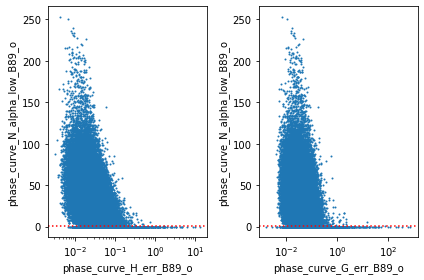

In [66]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_N_alpha_low_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

df_plot=df_atlas[~(np.isnan(df_atlas["phase_curve_H_err_B89_o"]))
    &(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                ]

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1)
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.axhline(N_alpha_low_cut,c="r",ls=":")
ax2.axhline(N_alpha_low_cut,c="r",ls=":")

plt.tight_layout()

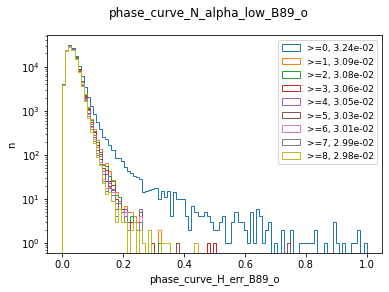

In [67]:
x_plot1="phase_curve_H_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

fig.suptitle("phase_curve_N_alpha_low_B89_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
bins=np.linspace(0,1,100) # choose bins such that limits are set
# bins=np.linspace(0,0.5,100) # choose bins such that limits are set

alpha_low_med_err_list=[]
N_alpha_low_cut_list=[]
for _N_alpha_low_cut in range(8+1):
    df_plot=df_atlas[~(np.isnan(df_atlas["phase_curve_H_err_B89_o"]))
                     &(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                     &(df_atlas["phase_curve_N_alpha_low_B89_o"]>=_N_alpha_low_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(_N_alpha_low_cut,np.median(df_plot[x_plot1])))
    alpha_low_med_err_list.append(np.median(df_plot[x_plot1]))
    N_alpha_low_cut_list.append(_N_alpha_low_cut)
    
ax1.set_xlabel(x_plot1)
ax1.set_ylabel("n")

ax1.legend(fontsize=9)

Text(0, 0.5, 'median(H_err_B89_o)')

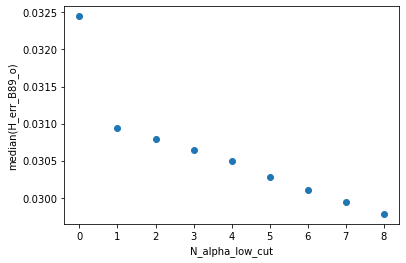

In [68]:
plt.scatter(N_alpha_low_cut_list,alpha_low_med_err_list)
plt.xlabel("N_alpha_low_cut")
plt.ylabel("median(H_err_B89_o)")

The biggest improvement in error appears to be selecting N_alpha_low_cut = 1. Should we go higher regardless? If N_alpha_low_cut = 8 then we are more likely to have two tracklets sampling low phase, brightness variations will hopefully even out.

Perform a cut on N_fit and N_alpha_low

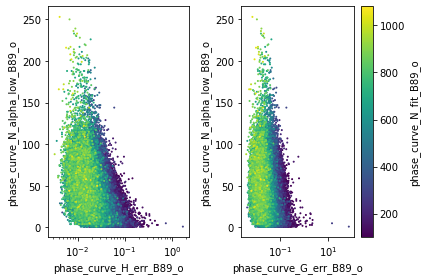

In [69]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_N_alpha_low_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

plt.tight_layout()

118060


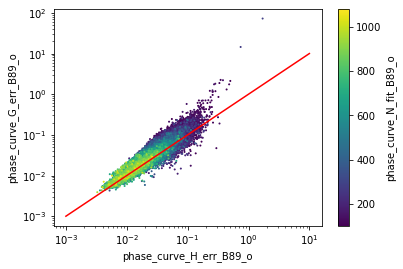

In [70]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)
print(len(df_plot))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,1)
ax1.plot(x_grid,x_grid,c="r")

ax1.set_xscale("log")
ax1.set_yscale("log")

In [71]:
df_plot[df_plot["phase_curve_G_err_B89_o"]>0.3][["name","phase_curve_N_alpha_low_B89_o",
                                                 "phase_curve_alpha_min_B89_o","detection_count_o",
                                                 "phase_curve_N_fit_B89_o","phase_curve_OC_std_B89_o"]]

,name,phase_curve_N_alpha_low_B89_o,phase_curve_alpha_min_B89_o,detection_count_o,phase_curve_N_fit_B89_o,phase_curve_OC_std_B89_o
216354,2002 TC170,1.0,2.0677,156.0,100.0,0.202861
121179,2000 SJ92,1.0,4.8326,198.0,100.0,0.241844
136780,2001 OE2,12.0,3.6649,174.0,100.0,0.323205
171983,2002 XN62,8.0,4.1258,113.0,100.0,0.298658
251129,2002 OC23,8.0,4.8996,110.0,100.0,0.393206
...,...,...,...,...,...,...
55358,2002 AM29,1.0,4.3425,257.0,168.0,0.290021
76464,2000 SA182,23.0,1.5126,238.0,179.0,0.208917
142961,2000 SE1,8.0,1.9230,383.0,206.0,0.386510
304053,2008 GO98,5.0,2.5677,363.0,280.0,0.301354


Some objects like Wilkening have high N_alpha_low but a relatively high phase_curve_alpha_min

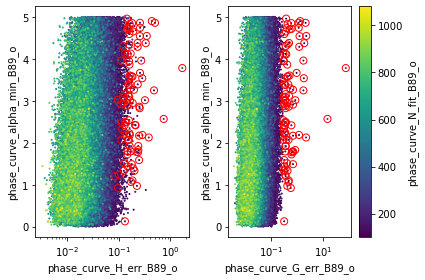

In [72]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_alpha_min_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]

df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

# ax1.axhline(N_alpha_low_cut,c="r",ls=":")
# ax2.axhline(N_alpha_low_cut,c="r",ls=":")

# df_plot2=df_plot[df_plot["phase_curve_G_err_B89_o"]>1]
df_plot2=df_plot[df_plot["phase_curve_G_err_B89_o"]>0.3]
s1=ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],s=50,edgecolor="r",facecolor="none")
s2=ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=50,edgecolor="r",facecolor="none")

plt.tight_layout()

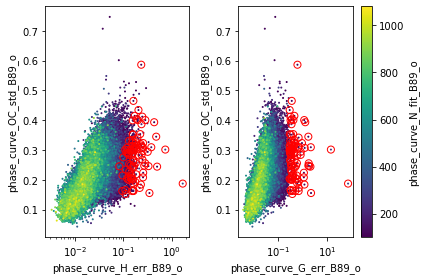

In [73]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_curve_OC_std_B89_o"
# y_plot1="phase_curve_OC_range_B89_o"
# y_plot1="phase_curve_OC_mean_B89_o"

x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

# df_plot=df_atlas
df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")

df_plot2=df_plot[df_plot["phase_curve_G_err_B89_o"]>0.3]
s1=ax1.scatter(df_plot2[x_plot1],df_plot2[y_plot1],s=50,edgecolor="r",facecolor="none")
s2=ax2.scatter(df_plot2[x_plot2],df_plot2[y_plot2],s=50,edgecolor="r",facecolor="none")

plt.tight_layout()

In [74]:
df_plot[np.absolute(df_plot["phase_curve_OC_std_B89_o"])>0.45].sort_values("phase_curve_OC_std_B89_o")[["name",
                                                  "phase_curve_N_alpha_low_B89_o",
                                                 "phase_curve_alpha_min_B89_o","detection_count_o",
                                                 "phase_curve_N_fit_B89_o","phase_curve_OC_std_B89_o"]]

,name,phase_curve_N_alpha_low_B89_o,phase_curve_alpha_min_B89_o,detection_count_o,phase_curve_N_fit_B89_o,phase_curve_OC_std_B89_o
150186,2002 TB9,13.0,1.3455,208.0,200.0,0.450858
208766,2004 RR191,37.0,1.1236,138.0,120.0,0.451669
52110,Mommsen,7.0,2.2284,282.0,242.0,0.451901
31983,2000 KF52,25.0,1.7632,283.0,263.0,0.452635
143518,2001 XL136,17.0,1.6520,161.0,128.0,0.453116
75970,2000 EJ150,23.0,1.3659,297.0,227.0,0.454063
70886,1999 YQ1,12.0,2.5426,142.0,139.0,0.455154
40910,1999 VC29,47.0,0.8211,174.0,127.0,0.455274
10588,1998 QH8,14.0,2.5064,384.0,288.0,0.455784
87489,2000 UE110,12.0,2.1944,241.0,105.0,0.456891


In [75]:
df_plot[np.absolute(df_plot["phase_curve_OC_mean_B89_o"])>0.2].sort_values("phase_curve_OC_mean_B89_o")[["name",
                                                  "phase_curve_N_alpha_low_B89_o",
                                                 "phase_curve_alpha_min_B89_o","detection_count_o",
                                                 "phase_curve_N_fit_B89_o","phase_curve_OC_mean_B89_o"]]

,name,phase_curve_N_alpha_low_B89_o,phase_curve_alpha_min_B89_o,detection_count_o,phase_curve_N_fit_B89_o,phase_curve_OC_mean_B89_o
69351,1998 FQ122,34.0,1.0815,342.0,322.0,-0.228565
69720,1999 CL85,29.0,0.9985,456.0,417.0,-0.226785
25836,2001 DC74,25.0,1.2113,541.0,357.0,-0.219057
89159,2002 AS21,40.0,2.5315,372.0,357.0,-0.212977
16675,Antonioleone,19.0,3.2145,545.0,506.0,-0.207832
...,...,...,...,...,...,...
41075,1999 XT18,15.0,1.3766,212.0,107.0,0.324293
89835,2004 CV,14.0,1.4292,236.0,102.0,0.325033
154664,2002 AC2,3.0,4.0221,202.0,122.0,0.358049
130576,2002 PJ91,54.0,0.5460,207.0,104.0,0.385927


In [76]:
df_plot[np.absolute(df_plot["phase_curve_OC_range_B89_o"])>2.5].sort_values("phase_curve_OC_range_B89_o")[["name",
                                                  "phase_curve_N_alpha_low_B89_o",
                                                 "phase_curve_alpha_min_B89_o","detection_count_o",
                                                 "phase_curve_N_fit_B89_o","phase_curve_OC_range_B89_o"]]

,name,phase_curve_N_alpha_low_B89_o,phase_curve_alpha_min_B89_o,detection_count_o,phase_curve_N_fit_B89_o,phase_curve_OC_range_B89_o
5760,Talos,14.0,1.4812,186.0,177.0,2.53459
292851,2003 QC10,12.0,4.0676,114.0,114.0,2.54626
211094,2003 AZ2,14.0,0.8752,163.0,138.0,2.58882
343916,1993 PC,8.0,1.8847,164.0,150.0,2.59527
85513,1999 NC43,17.0,2.2892,247.0,207.0,2.60239
9255,Johannes,35.0,1.8695,423.0,406.0,2.69068
150186,2002 TB9,13.0,1.3455,208.0,200.0,2.71150
5170,1990 UQ,18.0,2.9993,389.0,375.0,2.71609
112742,2002 TQ295,34.0,0.3783,195.0,168.0,2.81885
352106,2002 HK12,12.0,4.6254,248.0,243.0,2.88166


# check out phase angle range
What is the moving average of phase angle range?

In [77]:
# Sort data by x axis, semimajor axis
df_atlas=df_atlas.sort_values("a_semimajor_axis")
data_x=np.array(df_atlas["a_semimajor_axis"])
data_y=np.array(df_atlas["phase_angle_range_B89_o"])

# select window width for rolling average
window_width=100 

# cumulative sum of all y data (phase angle range), ORDERED by x axis
cumsum_vec_y = np.cumsum(data_y) 
# the average is taken every *window_width* number of data points
ma_vec_y = (cumsum_vec_y[window_width:] - cumsum_vec_y[:-window_width]) / window_width

# calculate the centre value of the bins in x
cent_bins_x = (data_x[window_width:] + data_x[:-window_width])/2

# alternatively plot based on the left or right bins
left_bins_x = data_x[window_width:]
right_bins_x = data_x[:-window_width]

In [78]:
%matplotlib notebook

In [79]:
%matplotlib inline

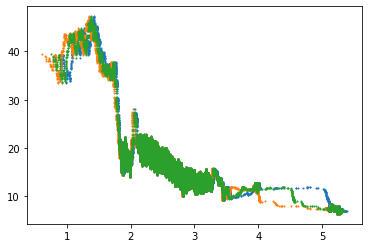

In [80]:
# plt.plot(left_bins_x,ma_vec_y)
# plt.plot(right_bins_x,ma_vec_y,ls=":")
# plt.plot(cent_bins_x,ma_vec_y)

plt.scatter(left_bins_x,ma_vec_y,s=1)
plt.scatter(right_bins_x,ma_vec_y,s=1)
plt.scatter(cent_bins_x,ma_vec_y,s=1)

Differences in lines arise due to where we define the value of the moving average relative to the bin edge (left, right or centre)?

Semimajor axis changes significantly leading to large difference in lines when numbers are small, e.g. 4<a(AU)<5.

When the moving average is plotted against the number index of each data point then we see that it is correctly shifted by the window_width

In [81]:
data_x_num=np.arange(len(data_y))
print(len(data_x),len(data_y),len(data_x_num))

cent_num_x = (data_x_num[window_width:] + data_x_num[:-window_width])/2
left_num_x = data_x_num[window_width:]
right_num_x = data_x_num[:-window_width]

356711 356711 356711


(0.0, 1000.0)

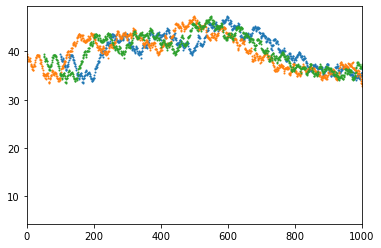

In [82]:
plt.scatter(left_num_x,ma_vec_y,s=1)
plt.scatter(right_num_x,ma_vec_y,s=1)
plt.scatter(cent_num_x,ma_vec_y,s=1)

plt.xlim(0,1000)

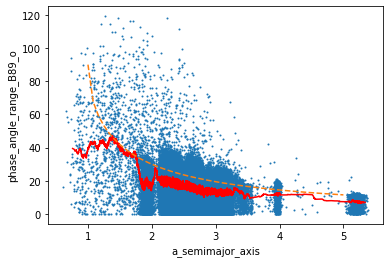

In [83]:
x_plot="a_semimajor_axis"
y_plot="phase_angle_range_B89_o"

df_plot=df_atlas
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

# ax1.set_xscale("log")
# ax1.set_ylim(0,1)

ax1.plot(cent_bins_x,ma_vec_y,c="r")

# bins_x=[left_bins_x,cent_bins_x,right_bins_x]
# for i,bx in enumerate(bins_x):
#     plt.plot(bx,ma_vec_y,c="C{}".format(i+1))

# plot max phase angle
a_AU=np.linspace(1,5)
ax1.plot(a_AU,np.degrees(np.arcsin(1.0/a_AU)),c='C1',ls="--")

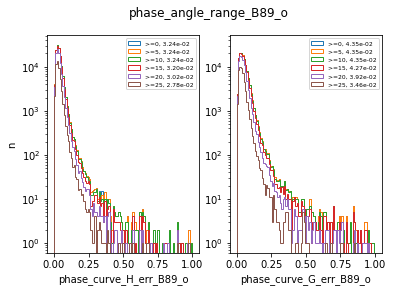

In [84]:
# do error analysis for phase angle range

x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharey=ax1)

fig.suptitle("phase_angle_range_B89_o")

# bins=100 # each dist spans a different range and bins may be skewed by outliers
bins=np.linspace(0,1,100) # choose bins such that limits are set

# for alph_cut in range(10+1):
# for alph_cut in np.arange(0,60+10,10):
for alph_cut in np.arange(0,25+5,5):
    df_plot=df_atlas[(df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                    & (df_atlas["phase_angle_range_B89_o"]>=alph_cut)]
    x=ax1.hist(df_plot[x_plot1],bins=bins,log=True,histtype="step",
               label=">={}, {:.2e}".format(alph_cut,np.median(df_plot[x_plot1])))
    x=ax2.hist(df_plot[x_plot2],bins=bins,log=True,histtype="step",
              label=">={}, {:.2e}".format(alph_cut,np.median(df_plot[x_plot2])))

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel("n")

ax1.legend(fontsize=6)
ax2.legend(fontsize=6)

Cutting phase angle range does not appear to improve the errors in H and G

497


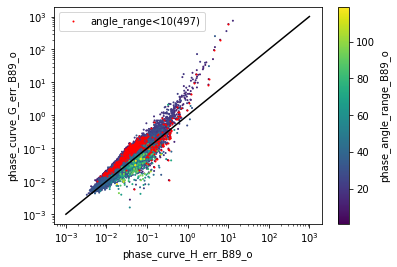

In [85]:
x_plot="phase_curve_H_err_B89_o"
y_plot="phase_curve_G_err_B89_o"
# c_plot="phase_curve_N_fit_B89_o"
c_plot="phase_angle_range_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

angle_range_low_cut=10
df_plot2=df_plot[df_plot["phase_angle_range_B89_o"]<angle_range_low_cut]

print(len(df_plot2))

fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = plt.subplot(gs[0,0])

s1=ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,c=df_plot[c_plot])
cbar=plt.colorbar(s1)
cbar.set_label(c_plot)

ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c="r",
            label="angle_range<{}({})".format(angle_range_low_cut,len(df_plot2)))

ax1.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)

x_grid=np.logspace(-3,3)
ax1.plot(x_grid,x_grid,c="k")

ax1.set_xscale("log")
ax1.set_yscale("log")

ax1.legend()

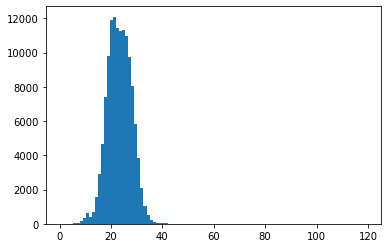

In [86]:
x=plt.hist(df_plot["phase_angle_range_B89_o"],bins=100)

A cut in phase angle range disproportionately removes the Trojans

Text(0.5, 0, 'a_semimajor_axis')

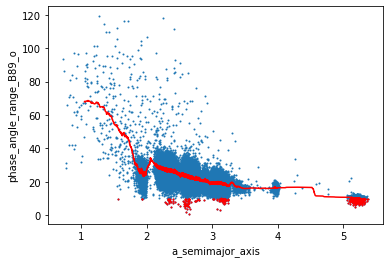

In [87]:
x_plot="a_semimajor_axis"
y_plot="phase_angle_range_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
# df_plot=df_plot.sort_values(c_plot)

angle_range_low_cut=10
df_plot2=df_plot[df_plot["phase_angle_range_B89_o"]<angle_range_low_cut]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)
ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,alpha=1,c="r")

# Sort data by x axis, semimajor axis
df_plot=df_plot.sort_values("a_semimajor_axis")
data_x=np.array(df_plot["a_semimajor_axis"])
data_y=np.array(df_plot["phase_angle_range_B89_o"])

# select window width for rolling average
window_width=100 

# cumulative sum of all y data (phase angle range), ORDERED by x axis
cumsum_vec_y = np.cumsum(data_y) 
# the average is taken every *window_width* number of data points
ma_vec_y = (cumsum_vec_y[window_width:] - cumsum_vec_y[:-window_width]) / window_width

# calculate the centre value of the bins in x
cent_bins_x = (data_x[window_width:] + data_x[:-window_width])/2

# plot moving average, note that the window is based on number of data points,
# not semimajor axis bins, hence odd values when there are few data points between 4 and 5 AU
ax1.plot(cent_bins_x,ma_vec_y,c="r")
# ax1.scatter(cent_bins_x,ma_vec_y,c="r")

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

Bin the data by semimajor axis and find the median phase angle in each bin.

https://stackoverflow.com/questions/6163334/binning-data-in-python-with-scipy-numpy

/Users/jrobinson/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jrobinson/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0, 'a_semimajor_axis')

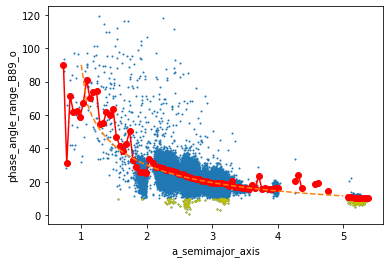

In [88]:
x_plot="a_semimajor_axis"
y_plot="phase_angle_range_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
# df_plot=df_plot.sort_values(c_plot)

angle_range_low_cut=10
df_plot2=df_plot[df_plot["phase_angle_range_B89_o"]<angle_range_low_cut]
                        
fig = plt.figure()
gs = gridspec.GridSpec(1,1)

ax1 = plt.subplot(gs[0,0])

ax1.scatter(df_plot[x_plot],df_plot[y_plot],s=1,alpha=1)
ax1.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,alpha=1,c="y")

# Sort data by x axis, semimajor axis
df_plot=df_plot.sort_values("a_semimajor_axis")
data_x=np.array(df_plot["a_semimajor_axis"])
data_y=np.array(df_plot["phase_angle_range_B89_o"])

# find the binned mean or median
bins=np.linspace(0.5,5.5,100)
digitized=np.digitize(data_x,bins=bins)
# bin_means = [np.mean(data_y[digitized == i]) for i in range(1, len(bins))]
bin_means = [np.median(data_y[digitized == i]) for i in range(1, len(bins))]
cent_bins_x=(bins[1:]+bins[:-1])/2.0
ax1.plot(cent_bins_x,bin_means,c="r")
ax1.scatter(cent_bins_x,bin_means,c="r")

# plot max phase angle
a_AU=np.linspace(1,5)
ax1.plot(a_AU,np.degrees(np.arcsin(1.0/a_AU)),c='C1',ls="--")

ax1.set_ylabel(y_plot)
ax1.set_xlabel(x_plot)

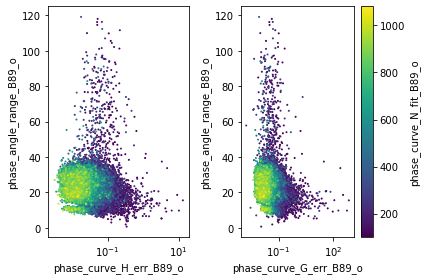

In [89]:
x_plot1="phase_curve_H_err_B89_o"
y_plot1="phase_angle_range_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot2=y_plot1

c_plot="phase_curve_N_fit_B89_o"

df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]
df_plot=df_plot.sort_values(c_plot)

fig = plt.figure()
gs = gridspec.GridSpec(1,2)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])

s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

cbar=plt.colorbar(s2)

ax1.set_xlabel(x_plot1)
ax2.set_xlabel(x_plot2)
ax1.set_ylabel(y_plot1)
ax2.set_ylabel(y_plot2)
cbar.set_label(c_plot)

ax1.set_xscale("log")
ax2.set_xscale("log")


plt.tight_layout()

In [90]:
 def error_plot(df_plot,y_plot,x_plot1,x_plot2,c_plot):
        
    x_plot1="phase_curve_H_err_B89_o"
    x_plot2="phase_curve_G_err_B89_o"
    y_plot1=y_plot
    y_plot2=y_plot

    df_plot=df_plot.sort_values(c_plot)

    fig = plt.figure()
    gs = gridspec.GridSpec(1,2)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])

    s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=df_plot[c_plot])
    s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=df_plot[c_plot])

    cbar=plt.colorbar(s2)

    ax1.set_xlabel(x_plot1)
    ax2.set_xlabel(x_plot2)
    ax1.set_ylabel(y_plot1)
    ax2.set_ylabel(y_plot2)
    cbar.set_label(c_plot)

    ax1.set_xscale("log")
    ax2.set_xscale("log")

    plt.tight_layout()
    
    plt.show()

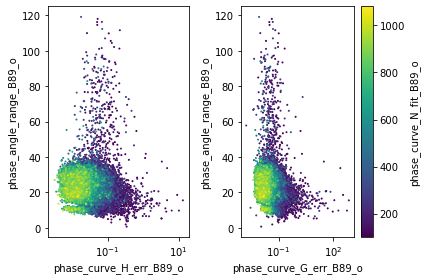

In [91]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
y_plot="phase_angle_range_B89_o"
c_plot="phase_curve_N_fit_B89_o"
df_plot=df_atlas[df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut]

error_plot(df_plot,y_plot,x_plot1,x_plot2,c_plot)

In [92]:
 def error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=[]):
        
    fig = plt.figure()
    fig.set_size_inches(2*4,len(y_plot_list)*3)

    if c_plot!=None:
        gs = gridspec.GridSpec(len(y_plot_list)+1,2,height_ratios=([1]*len(y_plot_list)+[0.1]))
        df_plot=df_plot.sort_values(c_plot)
    else:
        gs = gridspec.GridSpec(len(y_plot_list),2)


    for i,y_plot in enumerate(y_plot_list):
                           
        ax1 = plt.subplot(gs[i,0])
        ax2 = plt.subplot(gs[i,1])

        y_plot1=y_plot
        y_plot2=y_plot

        if c_plot!=None:
            col_plot=df_plot[c_plot]
        else:
            col_plot="C0"
            
        s1=ax1.scatter(df_plot[x_plot1],df_plot[y_plot1],s=1,c=col_plot)
        s2=ax2.scatter(df_plot[x_plot2],df_plot[y_plot2],s=1,c=col_plot)

        if len(df_cut)>0:
            s1=ax1.scatter(df_cut[x_plot1],df_cut[y_plot1],s=1,c="r")
            s2=ax2.scatter(df_cut[x_plot2],df_cut[y_plot2],s=1,c="r")
            
#         ax1.set_xlabel(x_plot1)
#         ax2.set_xlabel(x_plot2)
        ax1.set_ylabel(y_plot1)
#         ax2.set_ylabel(y_plot2)

        ax1.set_xscale("log")
        ax2.set_xscale("log")

    ax1.set_xlabel(x_plot1)
    ax2.set_xlabel(x_plot2)
    
    if c_plot!=None:
        ax_cbar = plt.subplot(gs[i+1,:])
        cbar=plt.colorbar(s2,ax_cbar,use_gridspec=True,orientation='horizontal')
        cbar.set_label(c_plot)

    plt.tight_layout()
    plt.show()

In [93]:
# [1]*len(y_plot_list)+[0.1]

In [94]:
N_fit_cut=100
N_alpha_low_cut=1

In [95]:
N_fit_cut,N_alpha_low_cut

(100, 1)

In [96]:
list(model_params)

['phase_curve_G_B89_o',
 'phase_curve_G_err_B89_o',
 'phase_curve_H_B89_o',
 'phase_curve_H_err_B89_o',
 'phase_curve_N_alpha_low_B89_o',
 'phase_curve_N_fit_B89_o',
 'phase_curve_N_iter_B89_o',
 'phase_curve_N_mag_err_B89_o',
 'phase_curve_N_nights_B89_o',
 'phase_curve_alpha_max_B89_o',
 'phase_curve_alpha_min_B89_o',
 'phase_curve_ier_B89_o',
 'phase_curve_nfev_B89_o',
 'phase_curve_OC_mean_B89_o',
 'phase_curve_OC_range_B89_o',
 'phase_curve_OC_std_B89_o',
 'phase_curve_N_cut_B89_o',
 'phase_curve_app_res_med_B89_o',
 'phase_curve_app_res_std_B89_o',
 'phase_curve_app_res_range_B89_o',
 'phase_angle_range_B89_o',
 'phase_curve_frac_good_fit_B89_o']

In [97]:
%matplotlib notebook

In [98]:
%matplotlib inline

118060 50429


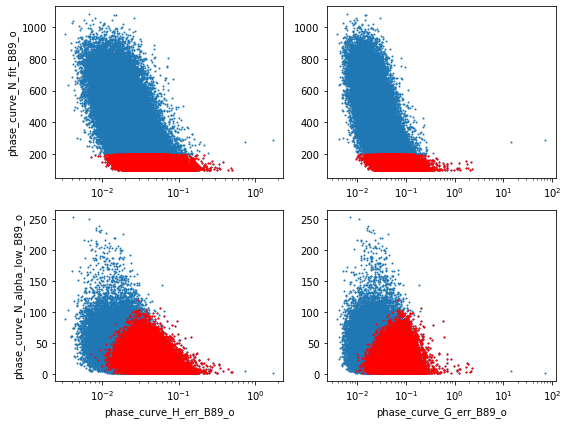

In [99]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

# y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o",
#             "phase_angle_range_B89_o","phase_curve_alpha_min_B89_o",
#             "phase_curve_OC_std_B89_o","phase_curve_OC_range_B89_o","phase_curve_OC_mean_B89_o",
#             "phase_curve_N_iter_B89_o","phase_curve_frac_good_fit_B89_o"]

# y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o","phase_angle_range_B89_o"]

y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
     )
# mask=((df_atlas["phase_curve_N_fit_B89_o"]>=200)
#                 & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=1)
#      )
df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

# df_cut = df_atlas[mask & (df_atlas["phase_curve_OC_range_B89_o"]>2.5)]

# highlight all fits with higher errors
# df_cut = df_atlas[mask & ((df_atlas["phase_curve_H_err_B89_o"]>0.2)
#                  | (df_atlas["phase_curve_G_err_B89_o"]>0.4))]

df_cut = df_atlas[mask & ((df_atlas["phase_curve_N_fit_B89_o"]<200)
#                  & (df_atlas["phase_curve_N_alpha_low_B89_o"]<25)
#                 & (df_atlas["phase_curve_alpha_min_B89_o"]>3)                         
                         )]

print(len(df_plot),len(df_cut))

# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,c_plot=None,df_cut=df_cut)
error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,df_cut=df_cut)
# error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

In [100]:
df_plot[df_plot["phase_curve_G_err_B89_o"]>1]

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
160017,2018-09-05 00:12:00,220.0,76.0,144.0,59261.342350,2021-06-10 09:17:40,2021-01-23 02:58:54,165751.0,2001 QA191,165751.0,...,0.025334,0.498893,0.068205,0.478485,0.009457,1.908083,0.047816,18.470364,26.3264,0.029703
193974,2018-06-01 18:40:51,232.0,62.0,170.0,59095.364444,2020-10-13 10:34:50,2020-10-15 17:08:23,208722.0,2002 JD119,208722.0,...,0.071799,0.145097,0.122614,0.118647,0.129709,2.306772,0.106964,12.411875,20.1373,0.063636
25956,2018-09-05 02:06:45,659.0,213.0,446.0,59347.267269,2021-06-16 15:48:48,2021-06-16 13:25:09,26054.0,4231 T-2,26054.0,...,0.355120,0.857089,0.345916,0.858396,0.348454,2.342375,0.133714,7.374080,24.0261,0.462500
61112,2018-09-04 22:04:56,405.0,121.0,283.0,59261.287581,2021-06-10 08:50:13,2021-02-02 04:43:54,61362.0,2000 PO19,61362.0,...,0.203247,0.102097,0.251858,0.056911,0.223267,2.454993,0.092504,5.597939,22.8870,0.181159
32135,2018-09-05 02:22:39,730.0,175.0,555.0,59179.202269,2020-10-21 16:29:41,2020-11-28 03:54:25,32255.0,2000 OT51,32255.0,...,0.138431,0.368101,0.191311,0.364640,0.143128,2.567393,0.215620,10.859628,21.2237,0.495327
251129,2018-06-01 15:43:07,153.0,43.0,110.0,59248.491748,2021-01-18 04:29:28,2021-02-05 03:34:51,302551.0,2002 OC23,302551.0,...,0.295721,0.645546,0.734518,0.649882,0.215285,2.584968,0.140736,13.760135,21.3860,0.110000
121831,2018-06-01 14:54:43,202.0,60.0,142.0,59016.401100,2020-05-27 05:10:16,2020-06-18 07:27:58,123483.0,2000 WX164,123483.0,...,NaN,0.562533,0.420869,0.563184,0.442649,2.678668,0.073808,12.159540,12.9492,0.000000
92699,2018-09-04 23:07:20,280.0,48.0,232.0,59386.393333,2021-06-19 21:56:22,2021-06-23 04:39:28,93382.0,2000 SB277,93382.0,...,0.648504,0.394107,0.674691,0.413298,0.758503,2.689993,0.170135,13.298097,20.3049,0.114035
115215,2018-09-04 23:37:53,202.0,49.0,153.0,59208.304340,2020-12-19 03:58:00,2020-12-27 07:43:44,116495.0,2004 BS15,116495.0,...,NaN,0.057537,0.267723,0.054873,0.284274,2.690423,0.071022,15.120153,17.5775,0.026549
83943,2018-09-04 09:51:02,484.0,167.0,317.0,59299.301667,2021-06-11 08:55:27,2021-06-12 18:09:05,84417.0,Ritabo,84417.0,...,0.688871,0.627022,0.677605,0.517072,0.698857,2.698004,0.170793,11.287840,22.4957,0.009346


356711
118060
118055
0 0 0 phase_curve_G_B89_o
1 0 1 phase_curve_G_err_B89_o
2 0 2 phase_curve_H_B89_o
3 0 3 phase_curve_H_err_B89_o
4 0 4 phase_curve_N_alpha_low_B89_o
5 1 0 phase_curve_N_fit_B89_o
6 1 1 phase_curve_N_iter_B89_o
7 1 2 phase_curve_N_mag_err_B89_o
8 1 3 phase_curve_N_nights_B89_o
9 1 4 phase_curve_alpha_max_B89_o
10 2 0 phase_curve_alpha_min_B89_o
11 2 1 phase_curve_ier_B89_o
12 2 2 phase_curve_nfev_B89_o
13 2 3 phase_curve_OC_mean_B89_o
14 2 4 phase_curve_OC_range_B89_o
15 3 0 phase_curve_OC_std_B89_o
16 3 1 phase_curve_N_cut_B89_o
17 3 2 phase_curve_app_res_med_B89_o
18 3 3 phase_curve_app_res_std_B89_o
19 3 4 phase_curve_app_res_range_B89_o


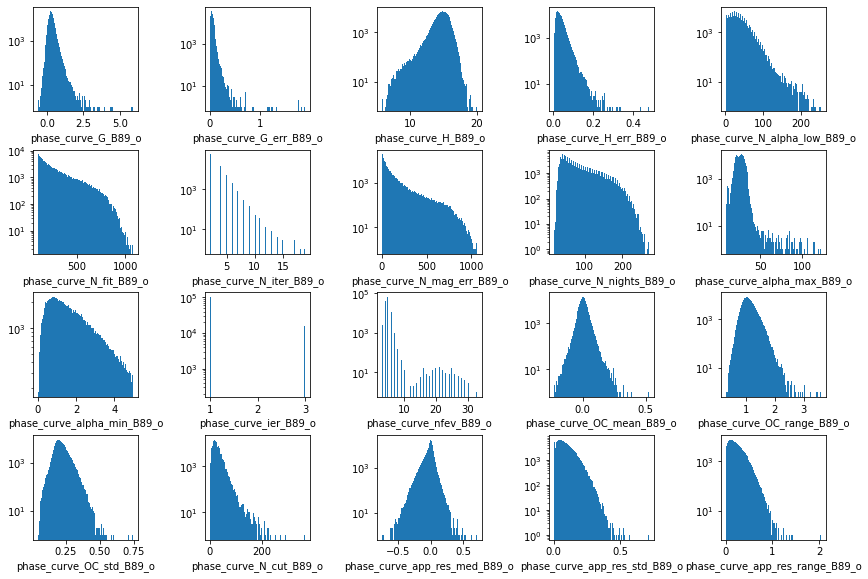

In [101]:
print(len(df_atlas))
df_plot=df_atlas[mask]
print(len(df_plot))
df_plot=df_plot[df_plot["phase_curve_G_err_B89_o"]<2] # cut weird Wilkening
print(len(df_plot))

x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_plot,x_fig,y_fig,model_params,n_bins,plot_log)

In [102]:
df_plot[df_plot["phase_curve_G_B89_o"]>2]

# high G 1999 XC160 and 2001 KX64 appear to have strong apparition effects
# relation between apparition effects and OC metrics? plot G vs OC

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
132422,2018-09-04 23:54:07,341.0,98.0,243.0,59338.314063,2021-06-15 22:32:45,2021-06-15 17:33:28,134766.0,2000 CY102,134766.0,...,0.075605,0.407938,0.063489,0.399699,0.077387,1.900295,0.014653,19.845619,27.4621,0.166667
145717,2018-06-01 18:28:22,199.0,60.0,139.0,59385.371424,2021-06-14 06:44:28,2021-06-22 05:55:53,149162.0,2002 GX10,149162.0,...,0.199496,0.076532,0.302183,0.081061,0.243474,1.923472,0.086705,21.156776,29.0884,0.509259
198611,2018-06-01 18:41:26,210.0,51.0,159.0,58771.328194,2019-09-25 04:38:49,2020-03-07 23:33:12,215120.0,1999 JG4,215120.0,...,NaN,0.427835,0.658926,0.428350,0.000000,2.225128,0.284204,7.826822,33.5239,0.500000
129781,2018-09-04 23:51:23,225.0,66.0,152.0,59027.322882,2020-06-23 08:14:49,2020-06-29 10:20:49,131921.0,2002 BH27,131921.0,...,NaN,0.265955,0.528767,0.330599,0.595760,2.293257,0.068833,7.963692,22.6379,0.008772
193974,2018-06-01 18:40:51,232.0,62.0,170.0,59095.364444,2020-10-13 10:34:50,2020-10-15 17:08:23,208722.0,2002 JD119,208722.0,...,0.071799,0.145097,0.122614,0.118647,0.129709,2.306772,0.106964,12.411875,20.1373,0.063636
10440,2018-09-05 01:24:11,1043.0,237.0,789.0,59382.612836,2021-06-19 21:38:27,2021-06-20 00:44:00,10487.0,Danpeterson,10487.0,...,0.137566,0.123885,0.154345,0.145983,0.137554,2.313251,0.170330,24.894844,25.4770,0.908309
90030,2018-09-04 23:03:55,235.0,53.0,182.0,59217.364931,2020-12-16 06:50:44,2021-01-05 05:09:19,90653.0,1904 T-3,90653.0,...,0.656822,0.319430,0.731699,0.256456,0.652058,2.329743,0.100136,5.494947,23.3375,0.085106
25956,2018-09-05 02:06:45,659.0,213.0,446.0,59347.267269,2021-06-16 15:48:48,2021-06-16 13:25:09,26054.0,4231 T-2,26054.0,...,0.355120,0.857089,0.345916,0.858396,0.348454,2.342375,0.133714,7.374080,24.0261,0.462500
128808,2018-09-04 23:51:23,191.0,41.0,148.0,59386.400127,2021-06-20 06:59:38,2021-06-23 04:50:47,130906.0,2000 VD42,130906.0,...,0.169214,0.327391,0.263209,0.320553,0.354533,2.380002,0.035123,3.087921,19.1516,0.090909
72747,2018-09-04 22:29:49,217.0,61.0,153.0,59386.513738,2021-06-21 14:51:49,2021-06-23 04:50:47,73090.0,2002 GT19,73090.0,...,0.397592,0.359470,0.391886,0.364834,0.402864,2.388475,0.093118,6.859688,23.5707,0.039216


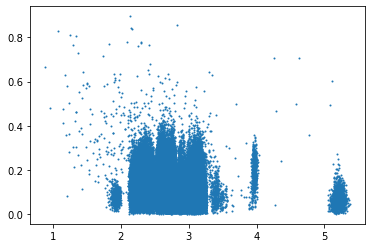

In [103]:
df_plot=df_atlas[mask]
plt.scatter(df_plot["a_semimajor_axis"],df_plot["e_eccentricity"],s=1)

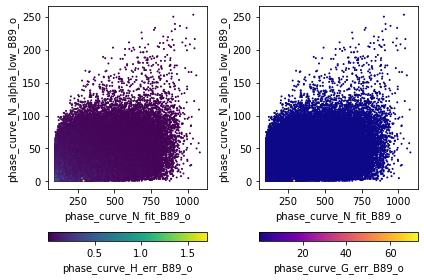

In [104]:
c_plot1="phase_curve_H_err_B89_o"
c_plot2="phase_curve_G_err_B89_o"
x_plot="phase_curve_N_fit_B89_o"
y_plot="phase_curve_N_alpha_low_B89_o"

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
     )
df_plot=df_atlas[mask]

df_plot1=df_plot.sort_values(c_plot1)
df_plot2=df_plot.sort_values(c_plot2)

fig = plt.figure()
gs = gridspec.GridSpec(2,2,height_ratios=[1,0.05])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

log_col=False

if log_col:
    col1=np.log10(df_plot1[c_plot1])
    col_lab1="log10({})".format(c_plot1)
    
    col2=np.log10(df_plot2[c_plot2])
    col_lab2="log10({})".format(c_plot2)
else:
    col1=df_plot1[c_plot1]
    col_lab1=c_plot1
    
    col2=df_plot2[c_plot2]
    col_lab2=c_plot2
    
s1=ax1.scatter(df_plot1[x_plot],df_plot1[y_plot],s=1,c=col1,cmap="viridis")
cbar1=plt.colorbar(s1,ax3,use_gridspec=True,orientation="horizontal")

s2=ax2.scatter(df_plot2[x_plot],df_plot2[y_plot],s=1,c=col2,cmap="plasma")
cbar2=plt.colorbar(s2,ax4,use_gridspec=True,orientation="horizontal")

ax1.set_xlabel(x_plot)
ax2.set_xlabel(x_plot)
ax1.set_ylabel(y_plot)
ax2.set_ylabel(y_plot)
cbar1.set_label(col_lab1)
cbar2.set_label(col_lab2)

plt.tight_layout()

plt.show()

In [105]:
N_fit_cut,N_alpha_low_cut

(100, 1)

In [106]:
df_atlas

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
295939,2018-06-01 15:49:57,44.0,20.0,24.0,59307.256713,2021-06-09 22:53:38,2021-06-13 07:40:03,418265.0,2008 EA32,418265.0,...,0.592706,0.478389,0.592529,0.478388,0.592706,0.615936,0.304978,28.264580,16.2819,0.000000
135574,2018-06-01 18:24:00,160.0,48.0,112.0,59292.571597,2021-06-12 04:18:34,2021-06-11 09:53:37,138127.0,2000 EE14,138127.0,...,1.710610,0.632953,1.655880,0.668775,1.710560,0.661787,0.533152,26.460975,62.0916,0.186813
405908,NaN,45.0,14.0,31.0,59041.297326,2020-07-13 13:47:06,2020-07-11 12:05:00,437844.0,1999 MN,437844.0,...,0.494889,0.781134,0.494882,0.776045,0.494893,0.673885,0.665375,2.021058,31.6259,0.529412
279317,NaN,18.0,10.0,8.0,59288.320012,2021-06-10 16:08:56,2021-06-11 22:40:31,364136.0,2006 CJ,364136.0,...,1.148500,0.230108,1.054620,0.230119,1.148500,0.676528,0.754919,10.230357,58.3009,0.000000
340451,NaN,69.0,7.0,62.0,58826.201968,2020-03-11 13:08:11,2020-03-13 14:17:02,413563.0,2005 TG45,413563.0,...,NaN,NaN,NaN,NaN,NaN,0.681417,0.372229,23.335226,55.7110,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181989,2018-06-01 15:26:34,200.0,57.0,139.0,59146.437442,2020-10-23 02:22:09,2020-10-26 07:32:13,192966.0,2000 CS140,192966.0,...,0.345867,0.300259,0.339988,0.262445,0.346303,5.362466,0.056615,5.298677,8.1008,0.000000
83517,2018-09-04 22:53:25,369.0,90.0,276.0,59186.326655,2020-10-23 06:20:32,2020-12-05 02:40:02,83984.0,2002 GL77,83984.0,...,0.181503,0.104343,0.147125,0.105889,0.130058,5.367196,0.040022,5.682860,9.6471,0.000000
389969,NaN,20.0,2.0,18.0,59136.427523,2020-10-18 18:50:48,2020-10-21 23:25:27,295904.0,2008 WP92,295904.0,...,NaN,NaN,NaN,NaN,NaN,5.368421,0.036417,4.636433,2.0174,NaN
183936,2018-06-01 15:27:14,326.0,87.0,225.0,59226.278900,2021-01-14 04:26:20,2021-01-04 10:15:30,195467.0,2002 GT114,195467.0,...,0.146507,0.130612,0.132881,0.200334,0.133430,5.373286,0.044389,10.467369,9.5096,0.011834


118060 50429


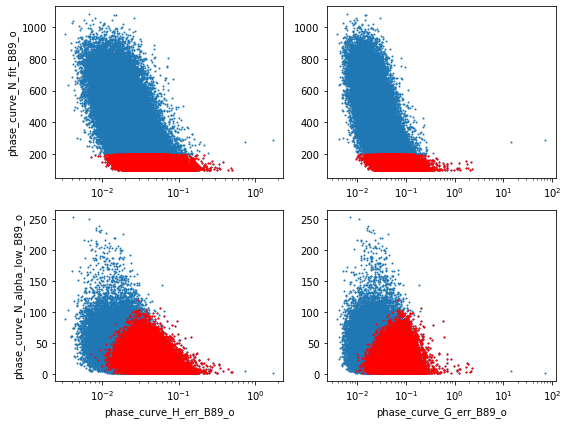

67631 289080


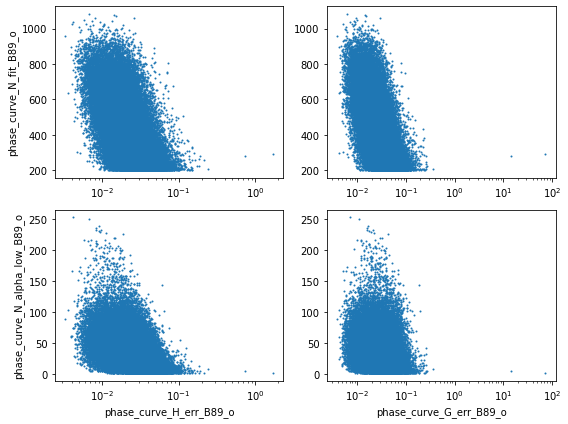

In [107]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=N_fit_cut)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=N_alpha_low_cut)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

df_cut = df_atlas[mask & ((df_atlas["phase_curve_N_fit_B89_o"]<200)                     
                         )]

print(len(df_plot),len(df_cut))

error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2,df_cut=df_cut)

x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=200)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=1)
     )
df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

print(len(df_plot),len(df_cut))

error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

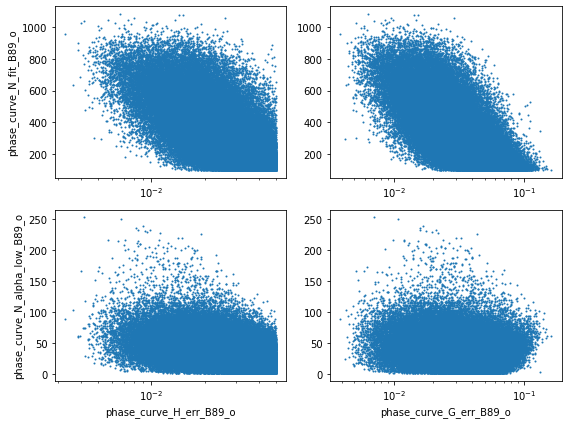

In [108]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=1)
      &(df_plot["phase_curve_G_err_B89_o"]<0.2)
                 & (df_plot["phase_curve_H_err_B89_o"]<0.05)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

In [109]:
# df_plot.to_csv("df_good_fits_B89_o.csv")

In [110]:
from scipy.stats import lognorm
param = lognorm.fit(df_plot["phase_curve_H_B89_o"])

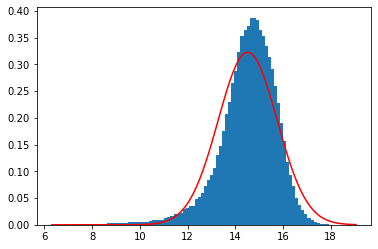

In [111]:
x=plt.hist(df_plot["phase_curve_H_B89_o"],bins=100,density=True)
x = np.linspace(np.amin(df_plot["phase_curve_H_B89_o"]),np.amax(df_plot["phase_curve_H_B89_o"]),100)
plt.plot(x, lognorm.pdf(x, param[0], loc=param[1], scale=param[2]),c = "r")
# x = df_plot["phase_curve_H_B89_o"]
# plt.scatter(x, lognorm.pdf(x, param[0], loc=param[1], scale=param[2]),c = "r")

In [112]:
weights = 1.0 / lognorm.pdf(df_plot["phase_curve_H_B89_o"], param[0], loc=param[1], scale=param[2])
print(weights)

[2323.44242401   22.277822    367.27570591 ...   17.02482979   19.86937826
   17.42349882]


In [113]:
df_sample = df_plot.sample(n=1000,weights = np.log10(weights))

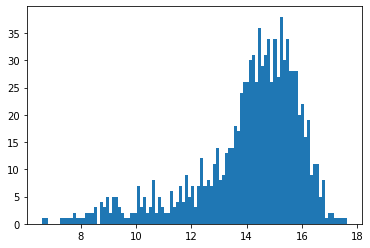

In [114]:
x=plt.hist(df_sample["phase_curve_H_B89_o"],bins=100)

In [115]:
# df_sample.to_csv("df_good_fits_sample_B89_o.csv")

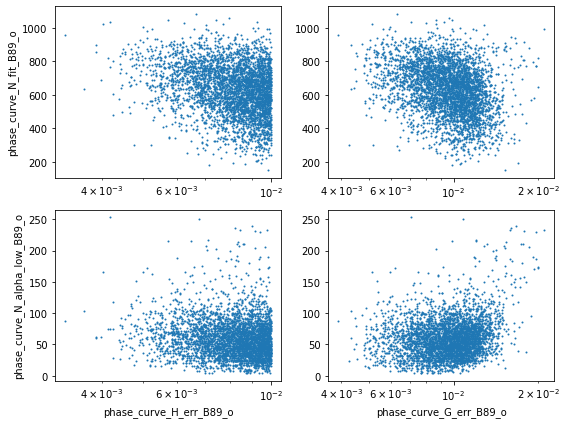

In [116]:
x_plot1="phase_curve_H_err_B89_o"
x_plot2="phase_curve_G_err_B89_o"
c_plot="phase_curve_N_fit_B89_o"

y_plot_list=["phase_curve_N_fit_B89_o","phase_curve_N_alpha_low_B89_o"]

df_plot=df_atlas
mask=((df_atlas["phase_curve_N_fit_B89_o"]>=100)
                & (df_atlas["phase_curve_N_alpha_low_B89_o"]>=1)
      &(df_plot["phase_curve_G_err_B89_o"]<0.1)
                 & (df_plot["phase_curve_H_err_B89_o"]<0.01)
     )

df_plot=df_atlas[mask]
df_cut=df_atlas[~mask]

error_plot_grid(df_plot,y_plot_list,x_plot1,x_plot2)

In [117]:
df_plot

,dateLastModified,detection_count,detection_count_c,detection_count_o,last_detection_mjd,last_photometry_update_date_c,last_photometry_update_date_o,mpc_number,name,orbital_elements_id,...,phase_curve_app_res_range_3M10_o,phase_curve_app_res_range_B89_c,phase_curve_app_res_range_B89_o,phase_curve_app_res_range_P16_c,phase_curve_app_res_range_P16_o,a_semimajor_axis,e_eccentricity,i_inclination_deg,phase_angle_range_B89_o,phase_curve_frac_good_fit_B89_o
9024,2018-09-04 15:55:30,983.0,232.0,739.0,59267.238947,2021-06-10 00:38:38,2021-06-10 20:34:33,9068.0,1993 OD,9068.0,...,0.084251,0.042172,0.116696,0.042149,0.116914,1.820468,0.149683,20.298168,38.7969,0.857351
69092,2018-09-04 22:22:23,837.0,197.0,637.0,59313.239803,2021-06-13 17:24:27,2021-06-13 07:56:28,69406.0,1995 SX48,69406.0,...,0.164335,0.178165,0.162869,0.178885,0.163856,1.844068,0.022542,21.995316,30.6970,0.755245
20850,2018-09-05 01:55:26,890.0,219.0,665.0,59373.284815,2021-06-19 07:09:36,2021-06-19 00:31:02,20936.0,Nemrut Dagi,20936.0,...,0.044011,0.057572,0.047055,0.057377,0.047210,1.854490,0.101061,18.599296,32.7548,0.831405
4659,2018-09-05 01:04:46,1183.0,268.0,915.0,59264.216528,2021-06-09 22:02:40,2021-06-10 14:11:34,4674.0,Pauling,4674.0,...,0.076044,0.057756,0.087143,0.056328,0.079625,1.858731,0.070447,19.438539,34.4793,0.830137
6583,2018-09-05 01:12:38,844.0,238.0,606.0,59383.608194,2020-06-27 03:42:26,2021-06-20 07:06:08,6618.0,Jimsimons,6618.0,...,0.030260,0.031688,0.022508,0.045136,0.027429,1.874956,0.044009,23.831844,31.9494,0.871795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24358,2018-09-05 02:03:00,1132.0,296.0,836.0,59385.426111,2021-06-19 19:42:41,2021-06-22 07:28:45,24451.0,2000 QS104,24451.0,...,0.300766,0.345998,0.305392,0.365666,0.283729,5.285081,0.130111,21.391064,9.8038,0.478599
1172,2020-10-20 15:19:07,1471.0,391.0,1080.0,59383.363553,2021-06-19 20:02:56,2021-06-20 07:58:54,1173.0,Anchises,1173.0,...,0.214644,0.247933,0.224433,0.277735,0.220466,5.285217,0.139238,6.922031,9.5490,0.914567
1402,2020-10-20 15:19:07,1058.0,276.0,766.0,59383.610938,2021-06-19 22:44:29,2021-06-20 08:03:38,1404.0,Ajax,1404.0,...,0.087001,0.101534,0.111176,0.073885,0.093693,5.288687,0.114432,18.030823,10.9524,0.905605
15386,2018-09-05 01:40:25,1214.0,242.0,972.0,59243.233102,2021-01-17 06:28:45,2021-01-31 04:44:36,15440.0,1998 WX4,15440.0,...,0.171636,0.220119,0.183353,0.214676,0.176912,5.293726,0.023241,28.750846,9.7409,0.860252


0 0 0 phase_curve_G_B89_o
1 0 1 phase_curve_G_err_B89_o
2 0 2 phase_curve_H_B89_o
3 0 3 phase_curve_H_err_B89_o
4 0 4 phase_curve_N_alpha_low_B89_o
5 1 0 phase_curve_N_fit_B89_o
6 1 1 phase_curve_N_iter_B89_o
7 1 2 phase_curve_N_mag_err_B89_o
8 1 3 phase_curve_N_nights_B89_o
9 1 4 phase_curve_alpha_max_B89_o
10 2 0 phase_curve_alpha_min_B89_o
11 2 1 phase_curve_ier_B89_o
12 2 2 phase_curve_nfev_B89_o
13 2 3 phase_curve_OC_mean_B89_o
14 2 4 phase_curve_OC_range_B89_o
15 3 0 phase_curve_OC_std_B89_o
16 3 1 phase_curve_N_cut_B89_o
17 3 2 phase_curve_app_res_med_B89_o
18 3 3 phase_curve_app_res_std_B89_o
19 3 4 phase_curve_app_res_range_B89_o


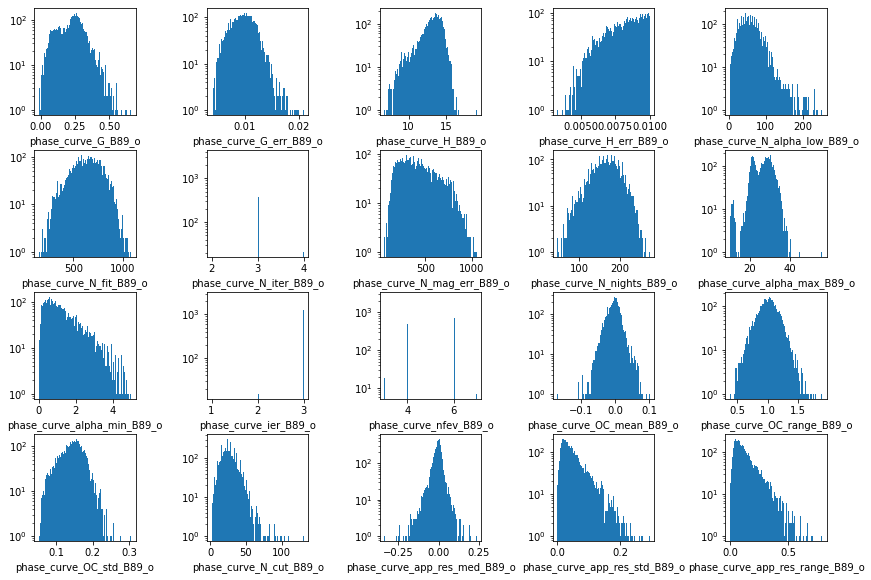

In [118]:
x_fig=5
y_fig=4
n_bins=[100]*len(model_params)
plot_log=[True]*len(model_params)
dbt.plot_hist_grid(df_plot,x_fig,y_fig,model_params,n_bins,plot_log)

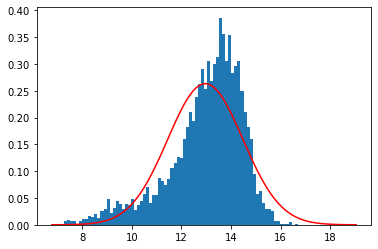

In [119]:
param = lognorm.fit(df_plot["phase_curve_H_B89_o"])
x=plt.hist(df_plot["phase_curve_H_B89_o"],bins=100,density=True)
x = np.linspace(np.amin(df_plot["phase_curve_H_B89_o"]),np.amax(df_plot["phase_curve_H_B89_o"]),100)
plt.plot(x, lognorm.pdf(x, param[0], loc=param[1], scale=param[2]),c = "r")

In [120]:
weights = 1.0 / lognorm.pdf(df_plot["phase_curve_H_B89_o"], param[0], loc=param[1], scale=param[2])
print(weights)

[  4.73438721   6.12956277   4.53287145 ... 100.0969019   62.63925438
  67.68529935]


In [121]:
df_sample = df_plot.sample(n=1000,weights = np.log10(weights))

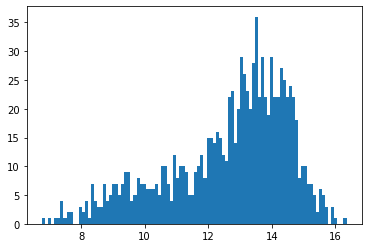

In [122]:
x=plt.hist(df_sample["phase_curve_H_B89_o"],bins=100)

In [123]:
# df_sample.to_csv("df_good_fits_sample_B89_o_13_8_2021.csv")